In [76]:
%cd ..
from catalog_query import get_VVV_catalog
import cutout_manager as cm
import vvv_plots as vvv

from jwst_plots import JWSTCatalog, make_cat_use

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table


import regions
from regions import Regions
import importlib as imp

imp.reload(vvv)
%cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament
/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [2]:
pos_ctr = SkyCoord('17:46:20.9063719501', '-28:37:51.6942550990', unit=(u.hourangle, u.deg))

In [3]:
position_HMSFR = SkyCoord('17:46:21.4669695284', '-28:35:38.1118497742', unit=(u.hourangle, u.deg))


In [ ]:
cutout_405 = cm.get_cutout_405(position_HMSFR, 8*u.arcmin, 3*u.arcmin)#, basepath='~/research/Research/JWST/')


In [5]:
#cat_VVV = get_VVV_catalog(position_HMSFR, w=3*u.arcmin, l=8*u.arcmin)
#get_VVV_catalog(pos_ctr, w=2*u.arcmin, l=2*u.arcmin)
cat_VVV = Table.read('/orange/adamginsburg/jwst/cloudc/catalogs/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits')
print(len(cat_VVV))

9945


In [21]:
# II/387/virac2
import regions
import numpy as np
from astroquery.vizier import Vizier

pos = SkyCoord('17:46:20.6290029866', '-28:37:49.5114204513', unit=(u.hour, u.deg))
l = 113.8*u.arcsec
w = 3.3*u.arcmin
reg = regions.RectangleSkyRegion(pos, width=l, height=w)
cutout_405 = cm.get_cutout_405(pos, w=l, l=w)

Vizier.ROW_LIMIT = 5e5
#Vizier.VIZIER_SERVER = 'vizier.cds.unistra.fr'
#Vizier.TIMEOUT = 120
cat_VVV = Vizier.query_region(coordinates=pos, width=l, height=w, catalog=['II/387/virac2'])[0]
#Vizier.get_catalogs('II/387/virac2')[0]
#Vizier.query_region(coordinates=pos, width=l, height=w, catalog=['II/387/virac2'])[0]
cat_VVV

srcid,RAJ2000,DEJ2000,Nep,e_RAJ2000,e_DEJ2000,plx,e_plx,pmRA,e_pmRA,pmDE,e_pmDE,Chi2,UWE,Zmag,e_Zmag,o_Zmag,Ymag,e_Ymag,o_Ymag,Jmag,e_Jmag,o_Jmag,Hmag,e_Hmag,o_Hmag,Ksmag,e_Ksmag,o_Ksmag,KsEp1,KsEpl,KsSkew,MedKsmag,e_MedKsmag,SIKsmag,SJKsmag,SKKsmag,NSIobs,etaKs,etaKsMod
,deg,deg,,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,d,d,,mag,mag,,,,,,
int64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,int16,float64,float32,int16,float64,float32,int16,float64,float32,int16,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64
13505497013275,266.599393606367,-28.657726923072,168,7.93044531,1.80289539,-6.22060123,10.8386719,-0.840880048,4.87947172,-8.23509197,4.18751843,90.565,0.523079,--,--,0,--,--,0,--,--,0,--,--,0,16.6655,0.1487,168,55423.17800192,58363.03076606,0.074753,0.112332,0.222874,0.1052,-0.1389,0.7882,59,1.5273,845282912.7
13505497009008,266.595312614038,-28.657673543607,202,3.36871533,3.57433294,1.29623148,4.95119705,-4.29806063,2.08586393,2.21442064,1.99676671,165.83,0.644677,--,--,0,--,--,0,--,--,0,17.2760,0.0957,11,15.5311,0.1001,202,55777.13705928,58363.03114536,-0.060358,0.065593,0.128668,0.1129,-0.1099,0.7813,69,1.7748,824845760
13505497012314,266.595319321445,-28.657053466991,175,9.1722163,7.40167845,5.3060098,12.8363598,-4.48665963,4.67073426,-10.581254,4.12193638,148.04,0.655057,--,--,0,--,--,0,--,--,0,--,--,0,16.6067,0.1775,175,55423.17848052,58363.03114536,-0.031806,0.123966,0.241944,0.1107,-0.1113,0.7650,60,1.9325,885793661.7
13505497000684,266.596501754724,-28.655964364930,113,10.8026757,8.74883809,4.27900952,15.4762903,7.16573626,6.12068007,6.36459745,5.05046477,102.52,0.681103,--,--,0,--,--,0,--,--,0,--,--,0,16.6766,0.1838,113,55777.13705928,58363.03076606,0.470635,0.122532,0.259415,0.1596,-0.0577,0.8183,37,1.2506,394419369.4
13505497013682,266.595554788933,-28.655906565695,206,6.92921077,4.42377708,5.09919752,9.6998324,1.16106719,3.68865243,-4.66911494,3.16670921,111.62,0.523698,--,--,0,--,--,0,--,--,0,--,--,0,16.5876,0.1547,206,55423.17848052,58363.03076606,0.176343,0.108201,0.208934,0.0945,-0.1096,0.7699,70,2.0230,831820935.5
13505497005768,266.590086446379,-28.657590785545,93,12.0000908,5.01563878,-0.569441085,17.8156544,0.884615207,6.30953696,-13.7614928,5.83955564,86.977,0.693207,--,--,0,--,--,0,--,--,0,--,--,0,16.5840,0.2043,93,55777.13797658,58360.04152915,-1.210806,0.117119,0.301267,0.0956,-0.1907,0.7438,28,1.8853,333506141.1
13505497020124,266.590416042472,-28.656413234387,316,2.03606615,1.64163565,-3.67654285,2.97196008,-7.55944472,1.09362116,-3.62956223,1.01198251,312.46,0.705930,--,--,0,--,--,0,19.2729,0.0000,1,16.3668,0.1719,24,14.6730,0.1016,309,55423.17800192,58363.03114536,1.089945,0.045468,0.072721,0.1517,0.0145,0.7671,106,1.8904,929073033.2
13505497005319,266.594764056836,-28.657507976894,298,5.82289194,4.78674136,-3.22784899,8.38384803,2.45206744,2.88491725,-2.72959885,2.6580904,526.72,0.944054,--,--,0,--,--,0,--,--,0,17.9280,0.0483,3,16.3148,0.1569,298,55423.17800192,58363.03114536,-0.411603,0.100655,0.185856,0.2102,-0.0072,0.7662,99,1.9183,1034231194


In [14]:
catalog_VVV = vvv.VVVCatalog(cat_VVV)

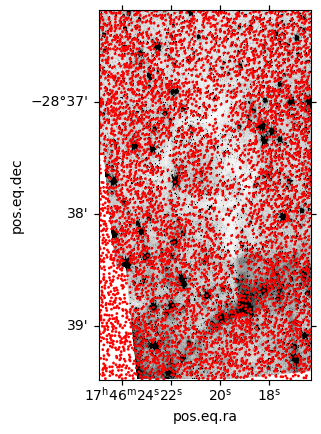

In [22]:
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(catalog_VVV.ra, catalog_VVV.dec, transform=ax.get_transform('world'), s=1, facecolor='none', edgecolor='red')

why


<Axes: xlabel='[H] - [KS]', ylabel='[KS]'>

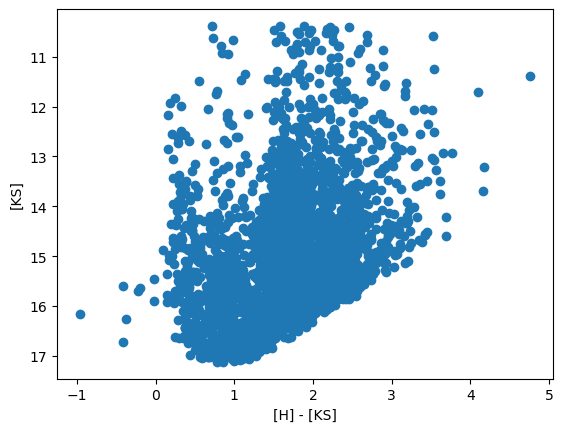

In [15]:
#color = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
#mag = cat_VVV['Ks1ap1']
#
#plt.figure()
#plt.scatter(color, mag)
#
#plt.gca().invert_yaxis()
#plt.xlabel('H-Ks')
#plt.ylabel('Ks')

catalog_VVV.plot_CMD('H', 'Ks', 'Ks')

why
why
why


/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


<Axes: xlabel='[J] - [H]', ylabel='[H]'>

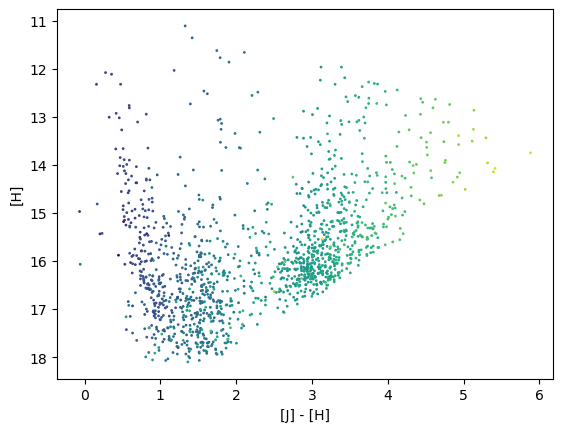

In [16]:
#color = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
#mag = cat_VVV['H1ap1']
color2 = catalog_VVV.color('J', 'H')
#cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
#
#plt.figure()
#im = plt.scatter(color, mag, c=color2, cmap='viridis')
#
#plt.gca().invert_yaxis()
#plt.ylabel('H')
#plt.xlabel('J-H')
#plt.colorbar(im, label='H-Ks')

catalog_VVV.plot_CMD('J', 'H', 'H', c=catalog_VVV.color('H', 'Ks'), s=1)

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/matplotlib/cbook.py:1699: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


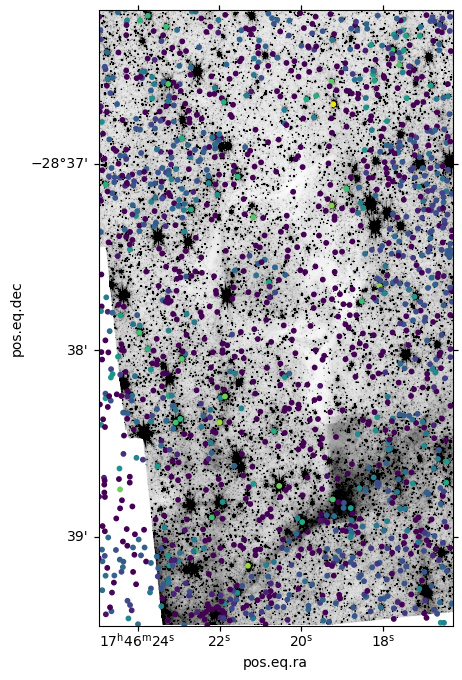

In [23]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_VVV['RAJ2000'], cat_VVV['DEJ2000'], transform=ax.get_transform('world'), s=10, facecolor='none', c=color2, cmap='viridis', vmin=2, vmax=6)

why


why


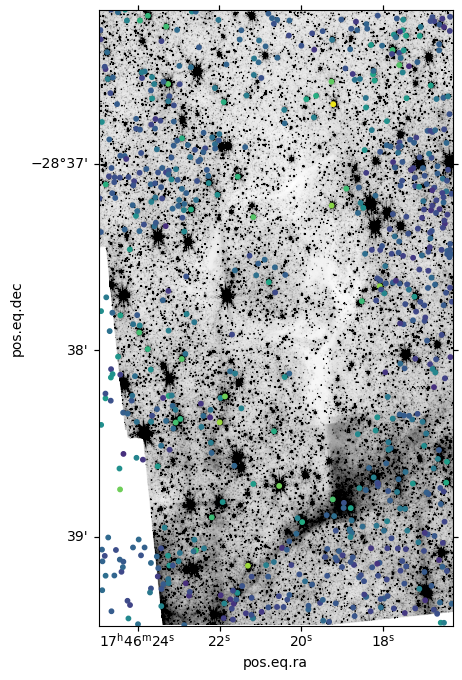

In [24]:
red_mask = catalog_VVV.color('J', 'H') > 2.5
cat_red = vvv.VVVCatalog(cat_VVV[red_mask])

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_red.ra, cat_red.dec, transform=ax.get_transform('world'), s=10, facecolor='none', c=cat_red.color('J', 'H'), cmap='viridis', vmin=2, vmax=6)

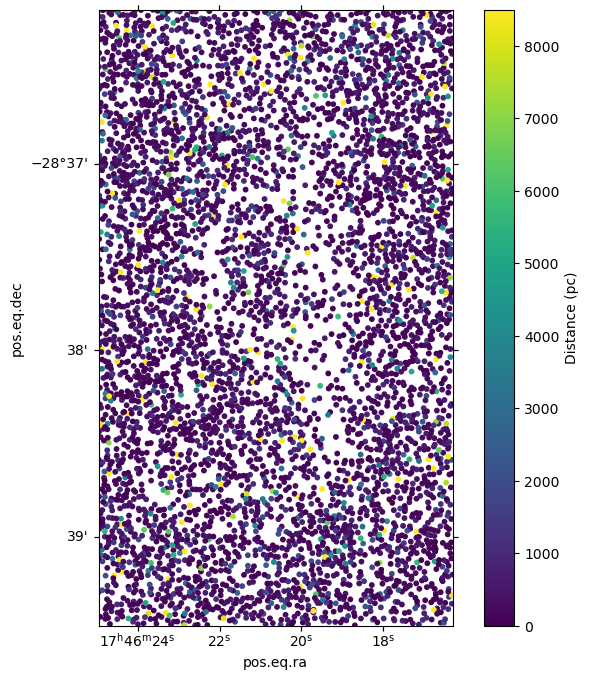

In [74]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data*np.nan, cmap='Greys', vmin=0, vmax=50)
im = ax.scatter(catalog_VVV.ra, catalog_VVV.dec, transform=ax.get_transform('world'), s=10, facecolor='none', c=(1/np.abs(np.array(catalog_VVV.catalog['plx'])*u.mas).to(u.arcsec)), cmap='viridis', vmin=0, vmax=8500)
plt.colorbar(im, label='Distance (pc)')


why
why


(-2.0, 3.0)

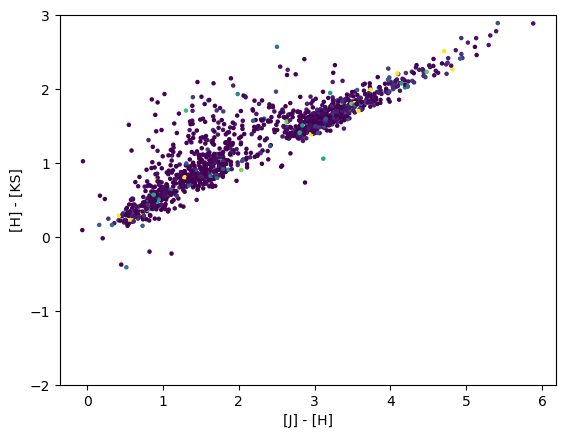

In [43]:
#color1 = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
#color2 = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
#
#plt.figure()
#plt.scatter(color, mag)
#
#plt.gca().invert_yaxis()
#plt.xlabel('J-H')
#plt.ylabel('H')

ax = plt.subplot()
catalog_VVV.plot_CCD('J', 'H', 'H', 'Ks', s=5, c=1/(np.array(catalog_VVV.catalog['plx'])*u.mas).to(u.arcsec).value, cmap='viridis', ax=ax, vmin=0, vmax=8000)
ax.set_ylim(-2, 3)


why
why


<Axes: xlabel='[J] - [H]', ylabel='[H]'>

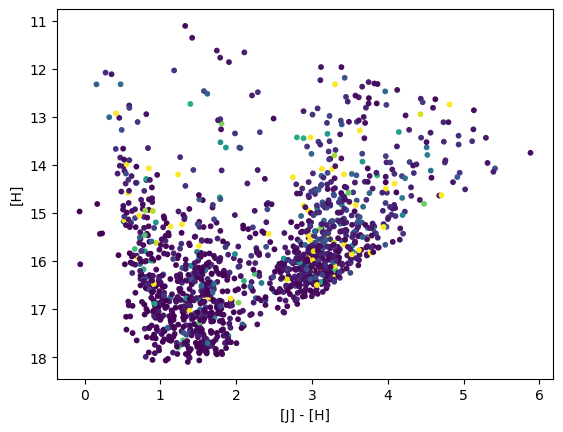

In [52]:
#color = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
#mag = cat_VVV['H1ap1']
color2 = catalog_VVV.color('J', 'H')
#cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
#
#plt.figure()
#im = plt.scatter(color, mag, c=color2, cmap='viridis')
#
#plt.gca().invert_yaxis()
#plt.ylabel('H')
#plt.xlabel('J-H')
#plt.colorbar(im, label='H-Ks')

catalog_VVV.plot_CMD('J', 'H', 'H', c=1/np.abs((np.array(catalog_VVV.catalog['plx'])*u.mas).to(u.arcsec).value), s=10, vmin=0, vmax=8000)

In [ ]:
1/().to(u.arcsec)

Unit("marcsec")

(array([  0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   1.,
          0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   2.,   1.,
          1.,   3.,   0.,   2.,   2.,   0.,   1.,   1.,   1.,   2.,   4.,
          0.,   2.,   0.,   4.,   1.,   0.,   2.,   4.,   1.,   4.,   3.,
          0.,   4.,   4.,   3.,   4.,   5.,   4.,   3.,   6.,   4.,   3.,
          7.,   7.,   5.,   3.,  13.,  10.,   7.,   7.,  11.,  11.,  12.,
         15.,  17.,  18.,  29.,  12.,  29.,  31.,  30.,  33.,  37.,  43.,
         49.,  54.,  68.,  65., 105., 128., 147., 177., 171., 263., 312.,
        424., 451., 431., 331., 248., 205., 162., 152.,  96.,  85.,  66.,
         52.,  69.,  52.,  44.,  35.,  32.,  20.,  22.,  23.,  15.,  10.,
         13.,   7.,   7.,  16.,   6.,   8.,   9.,   4.,  10.,   8.,  10.,
          6.,   5.,   7.,   8.,   2.,   2.,   5.,   5.,   2.,   2.,   5.,
          2.,   3.,   1.,   1.,   2., 

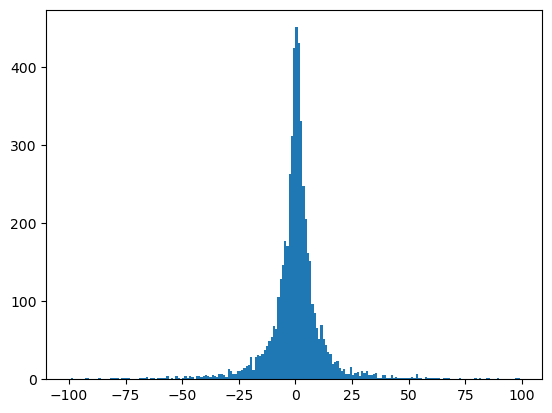

In [54]:
plt.hist(catalog_VVV.catalog['plx'], bins=np.arange(-100, 100))

In [55]:
catalog_VVV.catalog

srcid,RAJ2000,DEJ2000,Nep,e_RAJ2000,e_DEJ2000,plx,e_plx,pmRA,e_pmRA,pmDE,e_pmDE,Chi2,UWE,Zmag,e_Zmag,o_Zmag,Ymag,e_Ymag,o_Ymag,Jmag,e_Jmag,o_Jmag,Hmag,e_Hmag,o_Hmag,Ksmag,e_Ksmag,o_Ksmag,KsEp1,KsEpl,KsSkew,MedKsmag,e_MedKsmag,SIKsmag,SJKsmag,SKKsmag,NSIobs,etaKs,etaKsMod
,deg,deg,,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,d,d,,mag,mag,,,,,,
int64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,int16,float64,float32,int16,float64,float32,int16,float64,float32,int16,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64
13505497013275,266.599393606367,-28.657726923072,168,7.93044531,1.80289539,-6.22060123,10.8386719,-0.840880048,4.87947172,-8.23509197,4.18751843,90.565,0.523079,--,--,0,--,--,0,--,--,0,--,--,0,16.6655,0.1487,168,55423.17800192,58363.03076606,0.074753,0.112332,0.222874,0.1052,-0.1389,0.7882,59,1.5273,845282912.7
13505497009008,266.595312614038,-28.657673543607,202,3.36871533,3.57433294,1.29623148,4.95119705,-4.29806063,2.08586393,2.21442064,1.99676671,165.83,0.644677,--,--,0,--,--,0,--,--,0,17.2760,0.0957,11,15.5311,0.1001,202,55777.13705928,58363.03114536,-0.060358,0.065593,0.128668,0.1129,-0.1099,0.7813,69,1.7748,824845760
13505497012314,266.595319321445,-28.657053466991,175,9.1722163,7.40167845,5.3060098,12.8363598,-4.48665963,4.67073426,-10.581254,4.12193638,148.04,0.655057,--,--,0,--,--,0,--,--,0,--,--,0,16.6067,0.1775,175,55423.17848052,58363.03114536,-0.031806,0.123966,0.241944,0.1107,-0.1113,0.7650,60,1.9325,885793661.7
13505497000684,266.596501754724,-28.655964364930,113,10.8026757,8.74883809,4.27900952,15.4762903,7.16573626,6.12068007,6.36459745,5.05046477,102.52,0.681103,--,--,0,--,--,0,--,--,0,--,--,0,16.6766,0.1838,113,55777.13705928,58363.03076606,0.470635,0.122532,0.259415,0.1596,-0.0577,0.8183,37,1.2506,394419369.4
13505497013682,266.595554788933,-28.655906565695,206,6.92921077,4.42377708,5.09919752,9.6998324,1.16106719,3.68865243,-4.66911494,3.16670921,111.62,0.523698,--,--,0,--,--,0,--,--,0,--,--,0,16.5876,0.1547,206,55423.17848052,58363.03076606,0.176343,0.108201,0.208934,0.0945,-0.1096,0.7699,70,2.0230,831820935.5
13505497005768,266.590086446379,-28.657590785545,93,12.0000908,5.01563878,-0.569441085,17.8156544,0.884615207,6.30953696,-13.7614928,5.83955564,86.977,0.693207,--,--,0,--,--,0,--,--,0,--,--,0,16.5840,0.2043,93,55777.13797658,58360.04152915,-1.210806,0.117119,0.301267,0.0956,-0.1907,0.7438,28,1.8853,333506141.1
13505497020124,266.590416042472,-28.656413234387,316,2.03606615,1.64163565,-3.67654285,2.97196008,-7.55944472,1.09362116,-3.62956223,1.01198251,312.46,0.705930,--,--,0,--,--,0,19.2729,0.0000,1,16.3668,0.1719,24,14.6730,0.1016,309,55423.17800192,58363.03114536,1.089945,0.045468,0.072721,0.1517,0.0145,0.7671,106,1.8904,929073033.2
13505497005319,266.594764056836,-28.657507976894,298,5.82289194,4.78674136,-3.22784899,8.38384803,2.45206744,2.88491725,-2.72959885,2.6580904,526.72,0.944054,--,--,0,--,--,0,--,--,0,17.9280,0.0483,3,16.3148,0.1569,298,55423.17800192,58363.03114536,-0.411603,0.100655,0.185856,0.2102,-0.0072,0.7662,99,1.9183,1034231194


(array([1.215e+03, 1.074e+03, 6.390e+02, 4.530e+02, 3.030e+02, 2.440e+02,
        1.730e+02, 1.510e+02, 9.100e+01, 8.400e+01, 9.000e+01, 7.000e+01,
        4.500e+01, 4.600e+01, 3.700e+01, 4.000e+01, 3.300e+01, 2.700e+01,
        2.700e+01, 1.500e+01, 2.300e+01, 1.900e+01, 1.500e+01, 1.300e+01,
        1.100e+01, 1.100e+01, 1.500e+01, 1.000e+01, 7.000e+00, 1.200e+01,
        1.100e+01, 6.000e+00, 8.000e+00, 8.000e+00, 1.200e+01, 5.000e+00,
        1.100e+01, 1.000e+01, 8.000e+00, 4.000e+00, 7.000e+00, 3.000e+00,
        7.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 3.000e+00,
        5.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 6.000e+00, 1.000e+00,
        6.000e+00, 4.000e+00, 1.000e+00, 6.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00]),
 array([   0.,  1

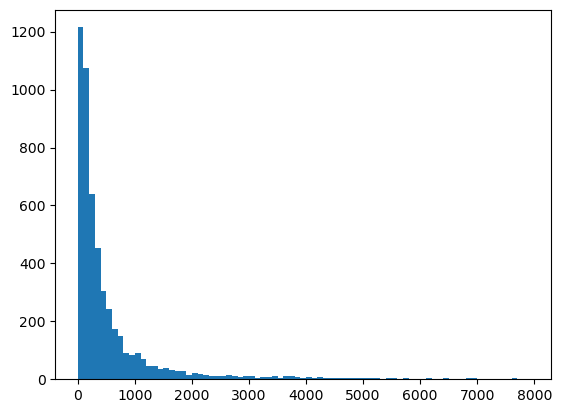

In [68]:
plt.hist((1/np.abs(np.array(catalog_VVV.catalog['plx'])*u.mas).to(u.arcsec)).value, bins=np.arange(0, 8000, 100))

# Merge with JWST

In [124]:
cat_use = make_cat_use()

In [125]:
def match_crds(basecrds, tb, tb_name):
    max_offset = 0.05*u.arcsec
    crds = tb['skycoord']

    matches, sep, _ = crds.match_to_catalog_sky(basecrds, nthneighbor=1)
    reverse_matches, reverse_sep, _ = basecrds.match_to_catalog_sky(crds, nthneighbor=1)
    mutual_matches = (reverse_matches[matches] == np.arange(len(matches)))

    newcrds = crds[(sep > max_offset) | (~mutual_matches)]
    basecrds = SkyCoord([basecrds, newcrds])
    return basecrds

In [126]:
catalog_VVV.catalog['skycoord'] = SkyCoord(ra=catalog_VVV.catalog['RAJ2000'], dec=catalog_VVV.catalog['DEJ2000'], unit=(u.deg, u.deg))
catalog_VVV.catalog['distance'] = 1/np.abs((np.array(catalog_VVV.catalog['plx'])*u.mas).to(u.arcsec)).value
cat_use.catalog['skycoord'] = cat_use.catalog['skycoord_ref']

In [127]:
tbls = [catalog_VVV.catalog, cat_use.catalog]
tbl_names = ['vvv', 'jwst']

ref_filter = 'vvv'
basecrds = catalog_VVV.catalog['skycoord']

max_offset = 0.1*u.arcsec

for i, tbl in enumerate(tbls):
    if tbl_names[i] == ref_filter:
        continue
    basecrds = match_crds(basecrds, tbl, tbl_names[i])

In [128]:
from astropy.table import Table, Column, MaskedColumn
from astropy import table

In [129]:
# Build the basetable
basetable = Table()
basetable['skycoord_ref'] = basecrds

for tbl, tbl_name in zip(tbls, tbl_names):
    wl = tbl_name

    crds = tbl['skycoord']
    matches, sep, _ = basecrds.match_to_catalog_sky(crds, nthneighbor=1)
    reverse_matches, reverse_sep, _ = crds.match_to_catalog_sky(basecrds, nthneighbor=1)
    mutual_matches = (reverse_matches[matches] == np.arange(len(matches)))

    basetable.add_column(name=f"sep_{wl}", col=sep)
    basetable.add_column(name=f'id_{wl}', col=matches)
    matchtb = tbl[matches]
    badsep = sep > max_offset

    for cn in matchtb.colnames:
        if isinstance(matchtb[cn], SkyCoord):
            matchtb.rename_column(cn, f"{cn}_{wl}")
            matchtb[f'mask_{wl}'] = badsep
        else:
            matchtb[f'{cn}_{wl}'] = MaskedColumn(data=matchtb[cn], name=f'{cn}_{wl}')
            matchtb[f'{cn}_{wl}'].mask[badsep] = True
            # mask non-mutual matches
            matchtb[f'{cn}_{wl}'].mask[~mutual_matches] = True
            matchtb.remove_column(cn)
    basetable = table.hstack([basetable, matchtb], join_type='exact')



In [130]:
basetable[:3]

skycoord_ref,sep_vvv,id_vvv,skycoord_vvv,srcid_vvv,RAJ2000_vvv,DEJ2000_vvv,Nep_vvv,e_RAJ2000_vvv,e_DEJ2000_vvv,plx_vvv,e_plx_vvv,pmRA_vvv,e_pmRA_vvv,pmDE_vvv,e_pmDE_vvv,Chi2_vvv,UWE_vvv,Zmag_vvv,e_Zmag_vvv,o_Zmag_vvv,Ymag_vvv,e_Ymag_vvv,o_Ymag_vvv,Jmag_vvv,e_Jmag_vvv,o_Jmag_vvv,Hmag_vvv,e_Hmag_vvv,o_Hmag_vvv,Ksmag_vvv,e_Ksmag_vvv,o_Ksmag_vvv,KsEp1_vvv,KsEpl_vvv,KsSkew_vvv,MedKsmag_vvv,e_MedKsmag_vvv,SIKsmag_vvv,SJKsmag_vvv,SKKsmag_vvv,NSIobs_vvv,etaKs_vvv,etaKsMod_vvv,mask_vvv,distance_vvv,sep_jwst,id_jwst,skycoord_ref_jwst,skycoord_f410m_jwst,skycoord_f212n_jwst,skycoord_f466n_jwst,skycoord_f405n_jwst,skycoord_f187n_jwst,skycoord_f182m_jwst,skycoord_jwst,mask_jwst,skycoord_ref_filtername_jwst,sep_f410m_jwst,id_f410m_jwst,flux_f410m_jwst,flux_err_f410m_jwst,mask_f410m_jwst,qfit_f410m_jwst,cfit_f410m_jwst,flux_init_f410m_jwst,flags_f410m_jwst,local_bkg_f410m_jwst,group_size_f410m_jwst,dra_f410m_jwst,ddec_f410m_jwst,std_ra_f410m_jwst,std_dec_f410m_jwst,nmatch_f410m_jwst,nmatch_good_f410m_jwst,flux_err_prop_f410m_jwst,flux_jy_f410m_jwst,mag_ab_f410m_jwst,eflux_jy_f410m_jwst,emag_ab_f410m_jwst,near_saturated_f410m_f410m_jwst,replaced_saturated_f410m_jwst,sep_f212n_jwst,id_f212n_jwst,flux_f212n_jwst,flux_err_f212n_jwst,mask_f212n_jwst,qfit_f212n_jwst,cfit_f212n_jwst,flux_init_f212n_jwst,flags_f212n_jwst,local_bkg_f212n_jwst,group_size_f212n_jwst,dra_f212n_jwst,ddec_f212n_jwst,std_ra_f212n_jwst,std_dec_f212n_jwst,nmatch_f212n_jwst,nmatch_good_f212n_jwst,flux_err_prop_f212n_jwst,flux_jy_f212n_jwst,mag_ab_f212n_jwst,eflux_jy_f212n_jwst,emag_ab_f212n_jwst,near_saturated_f212n_f212n_jwst,replaced_saturated_f212n_jwst,sep_f466n_jwst,id_f466n_jwst,flux_f466n_jwst,flux_err_f466n_jwst,mask_f466n_jwst,qfit_f466n_jwst,cfit_f466n_jwst,flux_init_f466n_jwst,flags_f466n_jwst,local_bkg_f466n_jwst,group_size_f466n_jwst,dra_f466n_jwst,ddec_f466n_jwst,std_ra_f466n_jwst,std_dec_f466n_jwst,nmatch_f466n_jwst,nmatch_good_f466n_jwst,flux_err_prop_f466n_jwst,flux_jy_f466n_jwst,mag_ab_f466n_jwst,eflux_jy_f466n_jwst,emag_ab_f466n_jwst,near_saturated_f466n_f466n_jwst,replaced_saturated_f466n_jwst,sep_f405n_jwst,id_f405n_jwst,flux_f405n_jwst,flux_err_f405n_jwst,mask_f405n_jwst,qfit_f405n_jwst,cfit_f405n_jwst,flux_init_f405n_jwst,flags_f405n_jwst,local_bkg_f405n_jwst,group_size_f405n_jwst,dra_f405n_jwst,ddec_f405n_jwst,std_ra_f405n_jwst,std_dec_f405n_jwst,nmatch_f405n_jwst,nmatch_good_f405n_jwst,flux_err_prop_f405n_jwst,flux_jy_f405n_jwst,mag_ab_f405n_jwst,eflux_jy_f405n_jwst,emag_ab_f405n_jwst,near_saturated_f405n_f405n_jwst,replaced_saturated_f405n_jwst,sep_f187n_jwst,id_f187n_jwst,flux_f187n_jwst,flux_err_f187n_jwst,mask_f187n_jwst,qfit_f187n_jwst,cfit_f187n_jwst,flux_init_f187n_jwst,flags_f187n_jwst,local_bkg_f187n_jwst,group_size_f187n_jwst,dra_f187n_jwst,ddec_f187n_jwst,std_ra_f187n_jwst,std_dec_f187n_jwst,nmatch_f187n_jwst,nmatch_good_f187n_jwst,flux_err_prop_f187n_jwst,flux_jy_f187n_jwst,mag_ab_f187n_jwst,eflux_jy_f187n_jwst,emag_ab_f187n_jwst,near_saturated_f187n_f187n_jwst,replaced_saturated_f187n_jwst,sep_f182m_jwst,id_f182m_jwst,flux_f182m_jwst,flux_err_f182m_jwst,mask_f182m_jwst,qfit_f182m_jwst,cfit_f182m_jwst,flux_init_f182m_jwst,flags_f182m_jwst,local_bkg_f182m_jwst,group_size_f182m_jwst,dra_f182m_jwst,ddec_f182m_jwst,std_ra_f182m_jwst,std_dec_f182m_jwst,nmatch_f182m_jwst,nmatch_good_f182m_jwst,flux_err_prop_f182m_jwst,flux_jy_f182m_jwst,mag_ab_f182m_jwst,eflux_jy_f182m_jwst,emag_ab_f182m_jwst,near_saturated_f182m_f182m_jwst,replaced_saturated_f182m_jwst,flux_jy_410m405_jwst,mag_ab_410m405_jwst,flux_jy_405m410_jwst,mag_ab_405m410_jwst,flux_jy_182m187_jwst,mag_ab_182m187_jwst,flux_jy_187m182_jwst,mag_ab_187m182_jwst
"deg,deg",deg,,"deg,deg",,deg,deg,,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,d,d,,mag,mag,,,,,,,,,deg,,"deg,deg","deg,deg","deg,deg","deg,deg","deg,deg","deg,deg","deg,deg","deg,deg",,,deg,,,,,,,,,,,,,deg,deg,,,,Jy,,Jy,,,,deg,,,,,,,,,,,,,deg,deg,,,,Jy,,Jy,,,,deg,,,,,,,,,,,,,deg,d

In [131]:
base_cat = JWSTCatalog(basetable)

(0.0, 2.0)

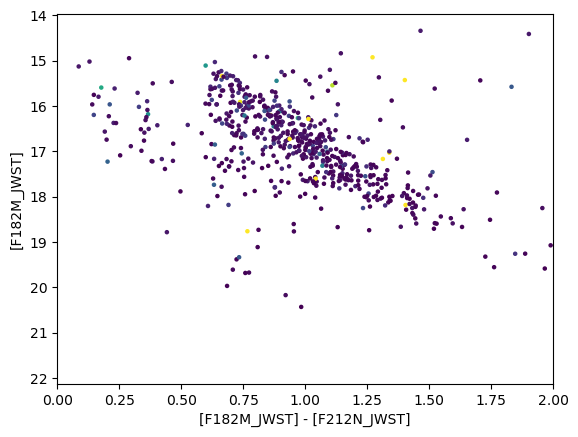

In [132]:
ax = plt.subplot(111)
base_cat.plot_CMD('f182m_jwst', 'f212n_jwst', 'f182m_jwst', c=base_cat.catalog['distance_vvv'], vmin=0, vmax=8000, s=5, ax=ax)
ax.set_xlim(0, 2)

(0.0, 2.0)

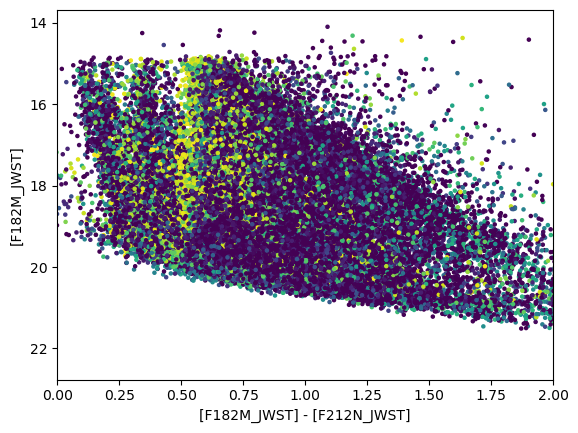

In [133]:
ax = plt.subplot(111)
base_cat.plot_CMD('f182m_jwst', 'f212n_jwst', 'f182m_jwst', c=base_cat.catalog['sep_vvv'], s=5, ax=ax)
ax.set_xlim(0, 2)